# first install below library

In [ ]:
# pip install pytrends matplotlib pandas seaborn plotly

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# setup pytrend library and keyword define

In [3]:
pytrends = TrendReq(hl = 'en-US',tz = 360)
keyword = "cloud computing"

# Data Requset

In [4]:
pytrends.build_payload([keyword],cat = 0, timeframe = 'today 12-m',geo ='',gprop='')

# country wise interest

In [19]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword,ascending = False).head(15)

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\1970366441.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




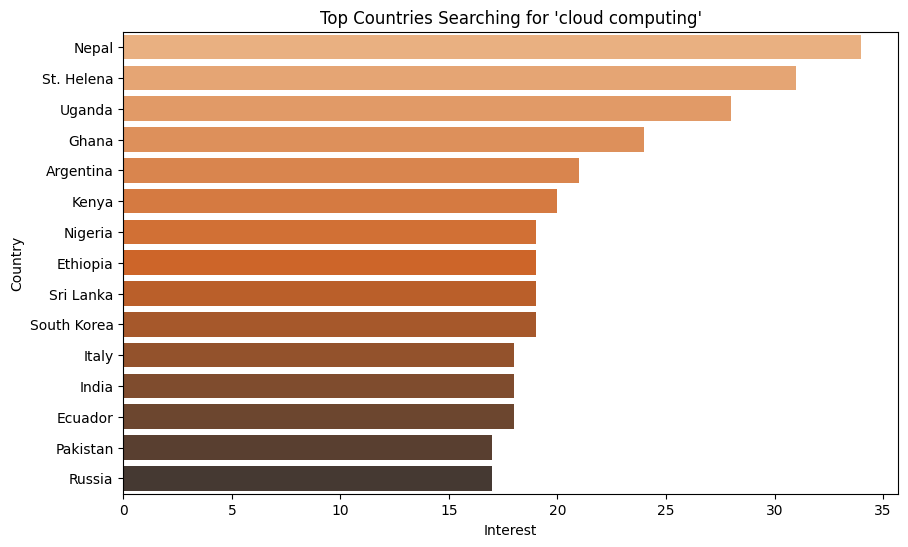

In [20]:
plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword],y = region_data.index, palette = "Oranges_d")
plt.title(f"Top Countries Searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# world map

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\1902531021.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



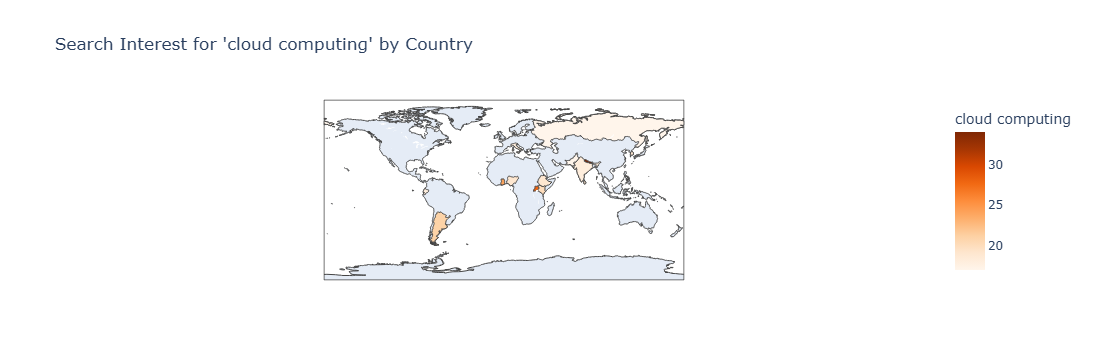

In [22]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations = 'geoName',
                    locationmode = 'country names',
                    color = keyword,
                    title = f"Search Interest for '{keyword}' by Country",
                    color_continuous_scale = 'Oranges')
fig.show()
                    

# time wise interest

In [8]:
time_df = pytrends.interest_over_time()

C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



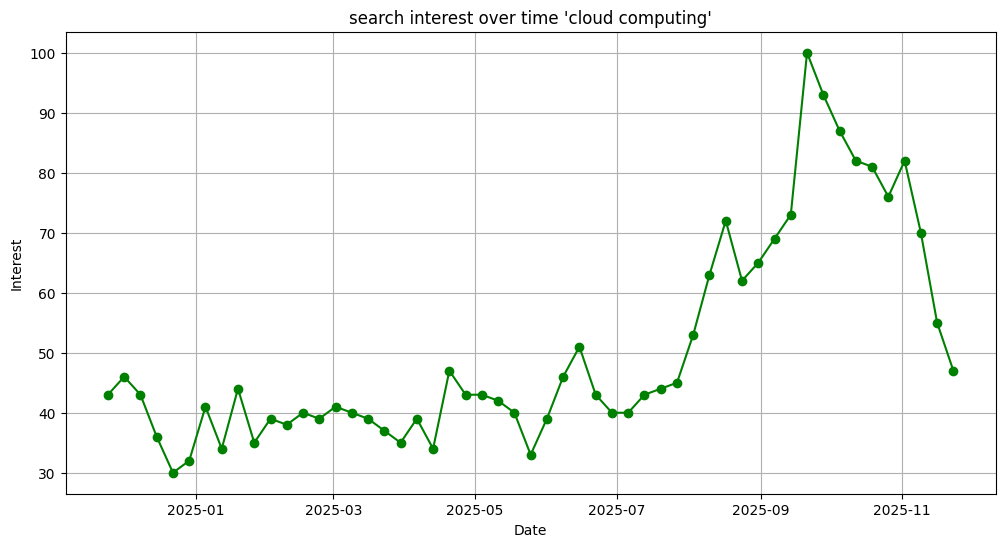

In [23]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker ='o',color = 'green')
plt.title(f"search interest over time '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# multiple keywords compare

In [10]:
kw_list = ["cloud computing","data analyst","machine learning"]
pytrends.build_payload(kw_list, cat= 0,timeframe = 'today 12-m', geo='',gprop='')

C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



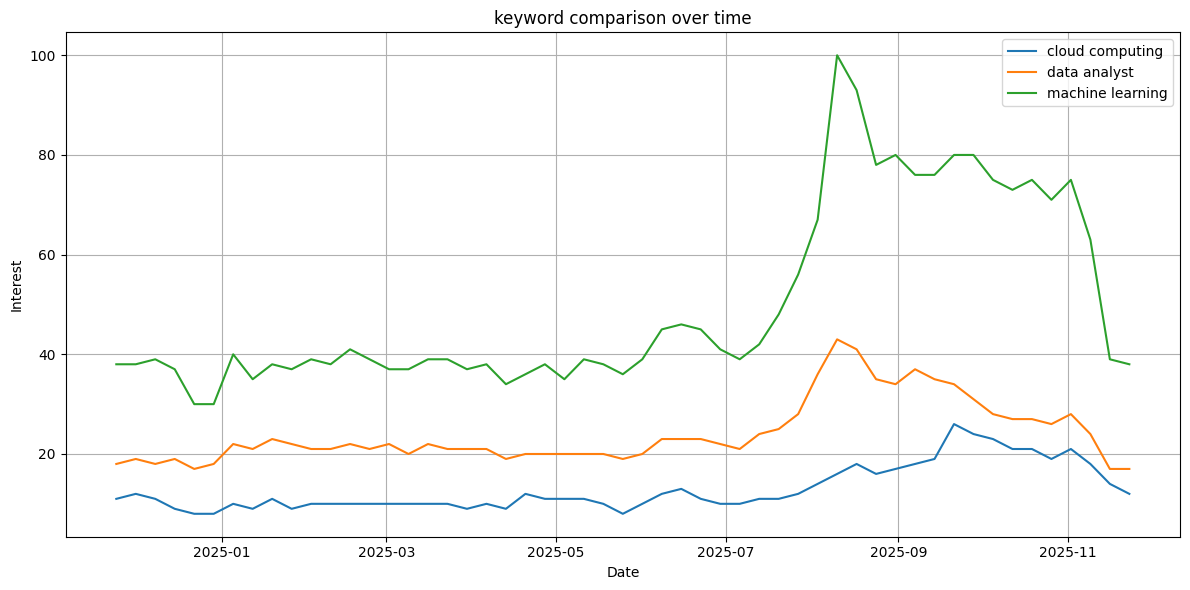

In [11]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)

plt.title("keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()